In [143]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [114]:
Qdata = pd.read_csv('QuasarData.txt', sep=' ', header = None, skipinitialspace=True)
Qdata.columns = ['Wavelength','FluxDensity','eFluxD']
print(Qdata)
Wavelength = Qdata['Wavelength']*0.1
FluxD = np.asarray(Qdata['FluxDensity'])

      Wavelength  FluxDensity  eFluxD
0          800.5        0.149   0.074
1          801.5        0.000   0.260
2          802.5        0.676   0.227
3          803.5        0.000   0.222
4          804.5        0.413   0.159
...          ...          ...     ...
7750      8550.5        0.733   0.056
7751      8551.5        0.723   0.049
7752      8552.5        0.718   0.054
7753      8553.5        0.776   0.046
7754      8554.5        0.792   0.065

[7755 rows x 3 columns]


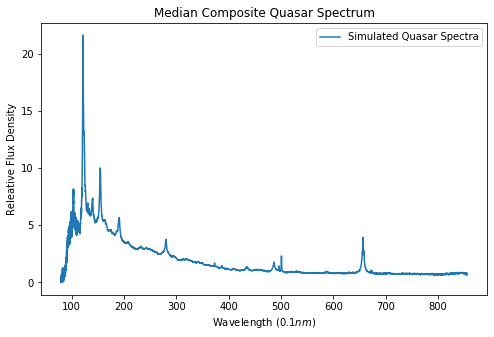

In [115]:
# Problem 1a
# want to plot spectrum of quasar (wavelength vs FluxDensity)
fig, ax = plt.subplots(1,1, figsize=(8,5))
ax.plot(Wavelength, FluxD, label='Simulated Quasar Spectra')
ax.set_title('Median Composite Quasar Spectrum')
ax.set_xlabel('Wavelength $(0.1nm)$')
ax.set_ylabel('Releative Flux Density')
ax.legend(loc='best')
plt.show()

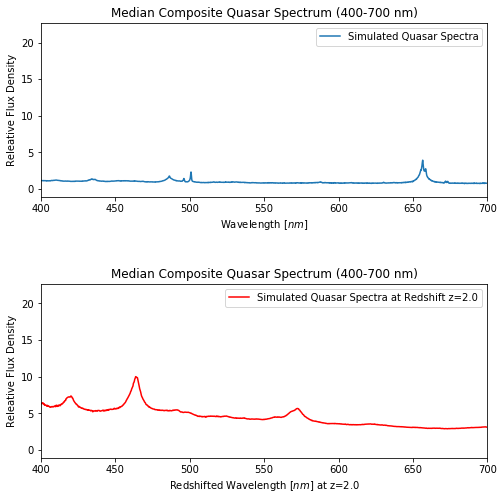

In [142]:
# Problem 1b
# Wavlengths = 400-700   ---- these are any wavelengths in table from 4000-7000
# create function that defines the observed wavelength based on emitted wavelength input at redshift of 0 and new redshift
def redshiftchange(zval, emit):
    observed = (1+zval) * (np.asarray(emit))
    return observed

z = 2.0  # set redshift to plot wavelengths observed at that redshift

# plot data only between (400 to 700)
redshiftedW = redshiftchange(z, Wavelength)


fig, ax = plt.subplots(2,1, figsize=(8,8))
ax0 = ax[0].plot(Wavelength, FluxD, label='Simulated Quasar Spectra')
ax[0].set_title('Median Composite Quasar Spectrum (400-700 nm)')
ax[0].set_xlabel('Wavelength $[nm]$')
ax[0].set_ylabel('Releative Flux Density')
ax[0].set_aspect('auto')
ax[0].set_xlim(400,700)
ax[0].legend(loc='best')

# plot at varying redshifts
RedshiftData = redshiftchange(z,QdataRange)
ax1 = ax[1].plot(redshiftedW, FluxD, label=f'Simulated Quasar Spectra at Redshift z={z}', c='r')
ax[1].set_title('Median Composite Quasar Spectrum (400-700 nm)')
ax[1].set_xlabel(f'Redshifted Wavelength $[nm]$ at z={z}')
ax[1].set_ylabel('Releative Flux Density')
ax[1].legend(loc='best')
ax[1].set_aspect('auto')
ax[1].set_xlim(400,700)
fig.subplots_adjust(hspace=0.5)
plt.show()

In [117]:
# Problem 2A
# want total throughputs for g- and i-bands
# filepaths are 
# ASTR499/throughputs/baseline/total_g.dat and ASTR499/throughputs/baseline/total_i.dat

In [118]:
gband = pd.read_csv('throughputs/baseline/total_g.dat', sep=' ', header=7)
gband.columns = ['Wavelength','Throughput']
gWavelength = gband['Wavelength'][0:7755]
gThroughput = gband['Throughput'][0:7755]

iband = pd.read_csv('throughputs/baseline/total_i.dat', sep=' ', header=7)
iband.columns = ['Wavelength', 'Throughput']
iWavelength = iband['Wavelength'][0:7755]
iThroughput = iband['Throughput'][0:7755]

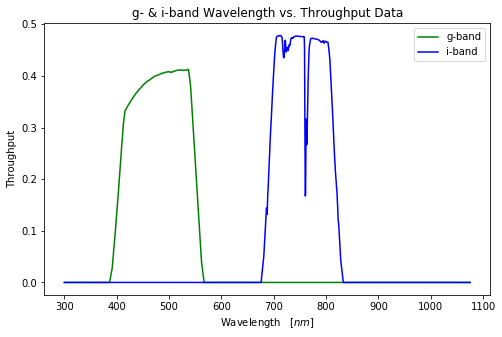

In [119]:
fig, ax = plt.subplots(1,1, figsize=(8,5))
ax.plot(gWavelength, gThroughput, label='g-band', c='g')
ax.plot(iWavelength, iThroughput, label='i-band', c='b')
ax.set_title('g- & i-band Wavelength vs. Throughput Data')
ax.set_xlabel('Wavelength   $[nm]$')
ax.set_ylabel('Throughput')
ax.legend(loc='best')
fig.subplots_adjust(hspace=0.5)
plt.show()

[ 200.125  200.375  200.625 ... 2138.125 2138.375 2138.625]


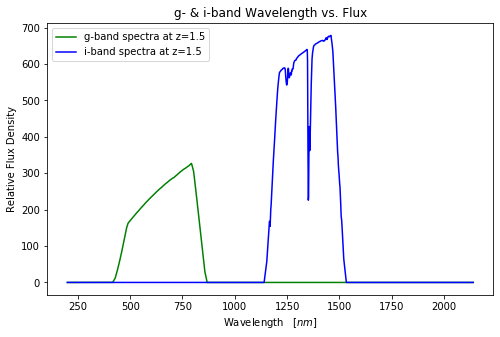

In [161]:
# select redshift you want to visualize
zz = 1.5
WaveZZ = np.asarray(redshiftchange(zz, Wavelength))
print(WaveZZ)
gRedshift = [i * j for i, j in zip(WaveZZ, gThroughput)]
iRedshift = [i * j for i, j in zip(WaveZZ, iThroughput)]


fig, ax = plt.subplots(1,1, figsize=(8,5))
ax.plot(WaveZZ, gRedshift, label=f'g-band spectra at z={zz}', c='g')
ax.plot(WaveZZ, iRedshift, label=f'i-band spectra at z={zz}', c='b')
ax.set_title('g- & i-band Wavelength vs. Flux')
ax.set_xlabel('Wavelength   $[nm]$')
ax.set_ylabel('Relative Flux Density')
ax.legend(loc='best')
fig.subplots_adjust(hspace=0.5)
plt.show()